In [1]:
### preamble
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import parallel_coordinates

food =  pd.read_csv("food_nutrient_2011_13_AHS.csv",header=0,low_memory=False)


In [2]:
### answer Q1
print ('***')
print ('Q1')
print("Number of foods:", food.shape[0])
print("Number of attributes:", food.shape[1])
print("")

types = food.dtypes
print(types)
print ('***')



#pandas.DataFrame.dtypes https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

***
Q1
Number of foods: 5740
Number of attributes: 57

Food ID                                                object
Survey ID                                               int64
Food Name                                              object
Survey flag                                            object
Energy, with dietary fibre (kJ)                         int64
Energy, without dietary fibre (kJ)                      int64
Moisture (g)                                          float64
Protein (g)                                           float64
Total fat (g)                                         float64
Available carbohydrates, with sugar alcohols (g)      float64
Available carbohydrates, without sugar alcohol (g)    float64
Starch (g)                                            float64
Total sugars (g)                                      float64
Added sugars (g)                                      float64
Free sugars (g)                                       float64
Dietary fibre (

In [3]:
#Q2


print("***")
print("Q2")
print("Median value of Magnesium: ", round(food["Magnesium (Mg) (mg)"].median(), 1)) 
print("Average value of Moisture: ", round(food["Moisture (g)"].mean(),1)) 
print("***")


***
Q2
Median value of Magnesium:  22.0
Average value of Moisture:  56.3
***


In [4]:
#Q3

##Part a
food['Survey ID']=food['Survey ID'].astype(str)


#part b
#food['food_category'] = food['Survey ID'].str.slice[0:2]
food['food_category'] = food['Survey ID'].str.slice(0,2)



##Part c
food['cat13'] = (food['food_category']== '13').astype(int)

perc_cat13 = np.round((food['cat13'].sum() / food.shape[0]) *100,1)
print("***")
print("Q3")
print("% of foods which are Cereal based products and dishes (Food category 13)  = ",perc_cat13)
print("***")





***
Q3
% of foods which are Cereal based products and dishes (Food category 13)  =  15.9
***


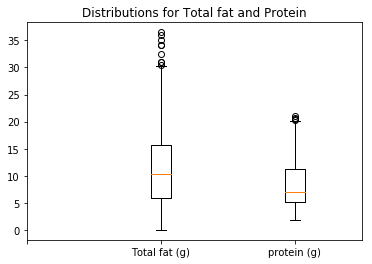

In [5]:
#Q4
food13 = food[food['food_category']== '13']
s1=food13['Total fat (g)']

s2=food13['Protein (g)']

plt.boxplot([s1,s2])
plt.xticks(range(3),["","Total fat (g)", "protein (g)"])
plt.title('Distributions for Total fat and Protein')
plt.show()

Text(0, 0.5, 'Mean total sugars')

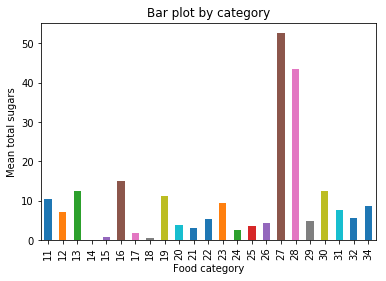

In [6]:
#Q5


bygroup = food.groupby('food_category')
picture=bygroup['Total sugars (g)'].mean().plot(kind='bar')
plt.title('Bar plot by category')
plt.xlabel('Food category')
plt.ylabel('Mean total sugars')




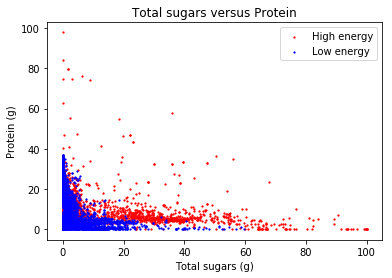

In [7]:
#Q6

food['EnergyLevel'] = np.where(food['Energy, with dietary fibre (kJ)']>1000, 1, 0)
food_high=food.loc[food['EnergyLevel']==1]
food_low=food.loc[food['EnergyLevel']==0]


#plt.scatter(food_high.iloc['Total sugars (g)'],food_high.iloc['Protein (g)'],color='red')
fig, ax = plt.subplots()

ax.scatter(food_high['Total sugars (g)'],food_high['Protein (g)'],color='red',label='High energy',s=1.5)
ax.scatter(food_low['Total sugars (g)'],food_low['Protein (g)'],color='blue',label='Low energy',s=1.5)
leg = ax.legend()



plt.xlabel('Total sugars (g)')
plt.ylabel('Protein (g)')
plt.title('Total sugars versus Protein')
plt.show()

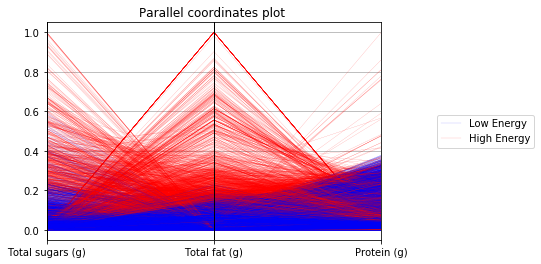

In [8]:
#Q7

### part a

foodq7 = food[['Total sugars (g)','Total fat (g)','Protein (g)','EnergyLevel']].copy()

for col in foodq7.columns[:-1]:
    min_val = foodq7[col].min()
    max_val = foodq7[col].max()
    foodq7[col]= (foodq7[col] - min_val )/(max_val-min_val)

##part b
foodq7.loc[foodq7['EnergyLevel']==0, 'EnergyLevel'] = "Low Energy"
foodq7.loc[foodq7['EnergyLevel']==1, 'EnergyLevel'] = "High Energy"

parallel_coordinates(foodq7[['Total sugars (g)','Total fat (g)','Protein (g)','EnergyLevel']],'EnergyLevel',color=['b','r'],lw=0.1)


plt.title('Parallel coordinates plot ')
plt.legend(loc='center left', bbox_to_anchor=(1.15, 0.5))

plt.show()



1.	Dripping, beef	900.8
2.	Fat, solid, vegetable oil based	900.8
3.	Shortening, commercial, animal fat (for short pastry, pie bases, tarts and flans)	900.8
4.	Lard	900.8
5.	Ghee, clarified butter	900.3



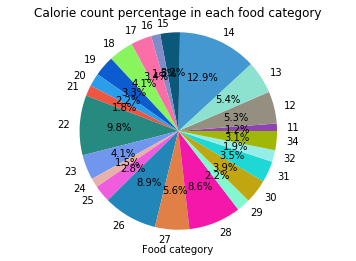

In [9]:
#Q8

###part a
food['cc']=4*food['Protein (g)'] +   4*food['Available carbohydrates, with sugar alcohols (g)']  +  9*food['Total fat (g)'] + 7*food['Alcohol (g)']


###part b

tmp=food.sort_values(by=['cc'],ascending=False)
tmp2=tmp[['Food Name','cc']].head(5)
tmp2['cc']=tmp2['cc'].round(1)
tmp2['list']=['1.','2.','3.','4.', '5.']
tmp2=tmp2[['list','Food Name','cc']]
          
print(tmp2.to_csv(sep='\t', index=False,header=False))


###part c
q8 = food[['food_category','cc']].groupby('food_category').agg({'cc':'mean'})
q8.cc.plot.pie(autopct='%1.1f%%',colors=
[(0.5553,0.264,0.6997),
(0.5837,0.562,0.5088),
(0.5531,0.8864,0.8103),
(0.265,0.5979,0.8189),
(0.0398,0.347,0.4803),
(0.4927,0.5498,0.7878),
(0.9826,0.4311,0.6547),
(0.535,0.9589,0.3695),
(0.0481,0.3612,0.8155),
(0.1642,0.6139,0.9204),
(0.9381,0.3364,0.2583),
(0.1503,0.5428,0.5058),
(0.4391,0.5878,0.9293),
(0.8977,0.6935,0.6602),
(0.9463,0.3559,0.8708),
(0.1344,0.5244,0.7274),
(0.877,0.5026,0.2766),
(0.9604,0.0912,0.6669),
(0.5103,0.9705,0.8143),
(0.7558,0.6458,0.0665),
(0.1152,0.8482,0.8314),
(0.5832,0.931,0.9085),
(0.6269,0.7195,0.0325)])

plt.xlabel('Food category')
plt.axis('equal')
plt.ylabel("")
plt.title('Calorie count percentage in each food category')
plt.show()




In [10]:
#Q9
#Q9.1
group_df =  pd.read_csv("8i. Australian Health Survey Classification System.csv",header=0,low_memory=False)
group_df = group_df.rename(columns={'Food Group Code': 'food_category', 'Food Group and Sub-Group Name':'food category name'})
group_df['food_category'] = group_df['food_category'].astype(str)
food_grp = pd.merge(food, group_df, on='food_category', how='left')

#Q9.2
bygroup = food_grp.groupby('food category name')
result = bygroup.aggregate({'Total sugars (g)': 'mean'})
result['Total sugars (g)'] = np.round(result['Total sugars (g)'], 1)
result = result.rename(columns={'Total sugars (g)':'mean total sugars (g) by category'})

import json
out = result.to_dict(orient='dict')
strout = json.dumps(out, indent=4, separators=(',', ': '))
print(strout)

{
    "mean total sugars (g) by category": {
        "Alcoholic beverages": 4.9,
        "Cereal based products and dishes": 12.5,
        "Cereals and cereal products": 7.1,
        "Confectionery and cereal/nut/fruit/seed bars": 43.5,
        "Dairy & meat substitutes": 3.7,
        "Egg products and dishes": 1.9,
        "Fats and oils": 0.1,
        "Fish and seafood products and dishes": 0.8,
        "Fruit products and dishes": 14.9,
        "Infant formulae and foods": 5.6,
        "Legume and pulse products and dishes": 3.7,
        "Meat, poultry and game products and dishes ": 0.5,
        "Milk products and dishes": 11.1,
        "Miscellaneous": 7.6,
        "Non-alcoholic beverages": 10.4,
        "Reptiles, amphibia and insects": 8.7,
        "Savoury sauces and condiments": 9.5,
        "Seed and nut products and dishes": 5.4,
        "Snack foods": 4.5,
        "Soup": 3.2,
        "Special dietary foods": 12.5,
        "Sugar products and dishes": 52.6,
        "Vegeta